<a href="https://colab.research.google.com/github/Raghs-7/Pytorch-tutorial/blob/main/IIS_q1_2024450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # for accuracy score
from scipy.sparse import hstack # to combine the both BOW and TF-IDF
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # for accuracy and all


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


     id                                               text  HS
0  6452  @indigomermaidd You're the exception , you wer...   1
1  4884  If a woman doesn't want you just unleash your ...   1
2  1931  Son of Jamestown, Protestants that made the US...   0
3  4942  Literally just got hit by a car bc this dumb b...   1
4  4721  charli: fuck you bitch charli: omg why am i so...   1
Non-HS (0): 3455 samples
HS (1): 2544 samples


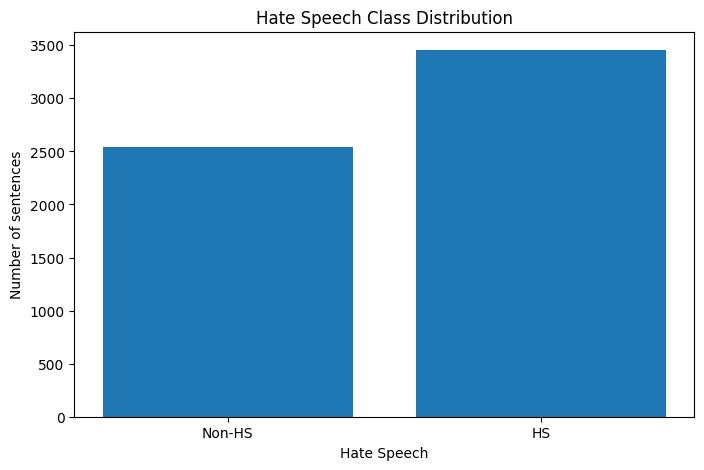

In [8]:
df = pd.read_csv("train_data.csv")
print(df.head())
labels = df['HS'].to_numpy()

HS_count = {}
for label in labels:
    HS_count[label] = HS_count.get(label, 0) + 1

print(f"Non-HS (0): {HS_count[0]} samples")
print(f"HS (1): {HS_count[1]} samples")

plt.figure(figsize=(8, 5))
plt.bar(['Non-HS', 'HS'], HS_count.values())
plt.xlabel('Hate Speech')
plt.ylabel('Number of sentences')
plt.title('Hate Speech Class Distribution')
plt.savefig('HS_distribution.png')
plt.show()

In [9]:
sentences_array = df['text'].to_numpy()

lemmatizer = WordNetLemmatizer()
preprocessed_data = []
stop_words = stopwords.words('english')
for sentence in sentences_array:
    tokens = word_tokenize(str(sentence).lower())
    filtered_tokens = [w for w in tokens if w.lower() not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    preprocessed_data.append(' '.join(lemmatized))

preprocessed_sentences = np.array(preprocessed_data)

In [10]:
vectorizer_bow = CountVectorizer(ngram_range=(1,2))
x = vectorizer_bow.fit_transform(preprocessed_sentences)
print("BOW : ")
print(x.toarray())

vectorizer_ifidf = TfidfVectorizer(ngram_range=(1, 2))
y = vectorizer_ifidf.fit_transform(preprocessed_sentences)
print("TF-IDF :")
print(y.toarray())

# Training
x_combined = hstack([x, y])
x_train, x_test, y_train, y_test = train_test_split(x_combined, labels, test_size=0.2, random_state=42)
clf = LinearSVC()
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("Evaluation on 20% of Training Data (Validation Set):")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


BOW : 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
TF-IDF :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Evaluation on 20% of Training Data (Validation Set):
Accuracy: 0.7733333333333333
Precision: 0.739514348785872
Recall: 0.6850715746421268
F1 Score: 0.7112526539278131


In [11]:
df1 = pd.read_csv("test.csv")
test_sentences_array = df1['text'].to_numpy()

test_preprocessed_data = []
for sentence in test_sentences_array:
    tokens = word_tokenize(str(sentence).lower())
    filtered_tokens = [w for w in tokens if w.lower() not in stop_words]
    lemmatized = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    test_preprocessed_data.append(' '.join(lemmatized))

test_preprocessed_sentences = np.array(test_preprocessed_data)

x_test_bow = vectorizer_bow.transform(test_preprocessed_sentences)
x_test_tfidf = vectorizer_ifidf.transform(test_preprocessed_sentences)
x_test_combined = hstack([x_test_bow, x_test_tfidf])

test_predictions = clf.predict(x_test_combined)

predictions_df = pd.DataFrame({'text': df1['text'],'predicted_HS': test_predictions})

predictions_df.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'")


Predictions saved to 'test_predictions.csv'


In [12]:
'''

bag of word --> BOW treats all words equally
TF-IDF --> TF-IDF don't treat all words equally, it oftern captures usefull info which leads to better prediction

'''

"\n\nbag of word --> BOW treats all words equally\nTF-IDF --> TF-IDF don't treat all words equally, it oftern captures usefull info which leads to better prediction\n\n"